In [1]:
import pandas as pd
import re
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 读pointerwise数据

In [14]:
def from_np_array(array_string):
  array_string = re.sub(r"[[\]]", "", array_string)
  return np.array(array_string.split(), dtype=np.int32)

In [15]:
pointewise_count_info = pd.read_csv('result/pointwise_count_info.csv',
                  converters={
                      'tag_id': from_np_array,
                  }
)

In [16]:
pointewise_count_info.head()

,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
0,1390439077689456046,0,0,31098.000,10,28,32,"[90253, 90130, 800001412, 697404, 5199144]",10106,101,6
1,3840388963883208110,0,31098,52861.000,7,10,32,"[800001783, 101810, 55754190, 56039974]",10503,105,3
2,8650234087955346810,0,52861,102291.000,16,16,8,"[1354564, 102674, 568971, 676446]",11804,118,4
3,8587184304183952814,0,102291,148654.000,15,19,5,"[476319, 800000950, 5872120, 9504442]",10401,104,1
4,2192073830832893306,0,148654,198191.000,16,16,40,"[630273, 800000501, 762563, 558968, 55817157]",11703,117,3


In [21]:
parwise_count_info = pd.read_csv('result/pairwise_count_info.csv')
parwise_count_info

,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
0,2345203561710400875,0,0,77241.000,25,28,35,[ 81774 9779785 55860984 9597678 55755306 ...,10802,108,2
1,5344606281729891758,0,77241,133078.000,18,28,75,[ 81774 723622 56044756 55831581 55860907 ...,10802,108,2
2,759945328762912122,0,133078,161005.000,9,23,7,[ 751495 503895 13664258 643902],11418,114,18
3,5560784129870034298,0,161005,185837.000,8,16,7,[ 503895 751495 13664258 643902],11418,114,18
4,2336209090533711226,0,185837,232160.000,15,11,0,[1356945 542699 680706 426140],11508,115,8
...,...,...,...,...,...,...,...,...,...,...,...
63608,3750336164790283694,0,3236967421,3237001578.000,11,25,30,[ 204431 55744120 800000950 55737387 80000...,10402,104,2
63609,6578593639340324218,0,3237001578,3237041949.000,13,32,42,[ 204431 55744120 800000950 55737387 80000...,10402,104,2
63610,4939290286258343342,0,3237041949,3237128491.000,28,11,80,[ 55756330 541241 392019 800001096],10001,100,1
63611,2750529751830584750,0,3237128491,3237162701.000,11,25,47,[ 541241 800001096 55756330 392019],10001,100,1


In [27]:
pc = pointewise_count_info['category_id']
wc = parwise_count_info['category_id']
pc ,wc

(0         10106
 1         10503
 2         11804
 3         10401
 4         11703
           ...  
 999995    10505
 999996    10001
 999997    10502
 999998    11604
 999999    12200
 Name: category_id, Length: 1000000, dtype: int64,
 0        10802
 1        10802
 2        11418
 3        11418
 4        11508
          ...  
 63608    10402
 63609    10402
 63610    10001
 63611    10001
 63612    10804
 Name: category_id, Length: 63613, dtype: int64)

In [45]:
result = pd.concat((pc,wc))
count = result.value_counts().rename_axis('category_id').reset_index(name='counts')

count.to_csv("category_id_count_info.csv", index=0)
count
# rs

,category_id,counts
0,11604,123251
1,10001,73289
2,10804,70063
3,10501,41312
4,11806,36883
...,...,...
323,12421,1
324,13609,1
325,11100,1
326,12105,1


<AxesSubplot:>

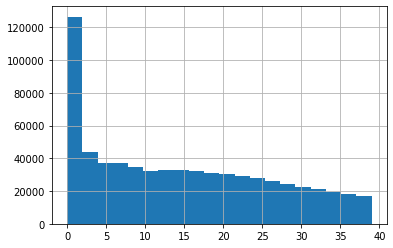

In [13]:
a =  pointewise_count_info[pointewise_count_info['asr_len']<40]
a['asr_len'].hist(bins=20)

In [41]:
category_id = pointewise_count_info['category_id']

In [42]:
count = category_id.value_counts().rename_axis('id').reset_index(name='counts')
count.head()

,id,counts
0,11604,115423
1,10001,69385
2,10804,67348
3,10501,39313
4,11806,35015


In [20]:
count.to_csv("category_id_count.csv", index=0)

In [5]:
pointewise_count_info["id"].duplicated().sum()

0

In [ ]:
def from_np_array(array_string):
  array_string = re.sub(r"[[\]]", "", array_string)
  return np.array(array_string.split(), dtype=np.int32)

In [31]:
tag = []
pointewise_count_info["tag_id"].apply(lambda x: tag.extend(x))
len(set(tag))

62880

In [32]:
tag[:10]

[90253,
 90130,
 800001412,
 697404,
 5199144,
 800001783,
 101810,
 55754190,
 56039974,
 1354564]

In [35]:
from collections import Counter
tag_c = Counter(tag)
tag_c.most_common()
tag_count = pd.DataFrame(tag_c.most_common(), columns=['tag_id', 'count'])

tag_count.head()

,tag_id,count
0,541241,71992
1,392019,71762
2,55804072,49672
3,800000568,48636
4,800001718,48325


In [36]:
tag_count.to_csv("result/tag_count_info.csv",index = 0)

In [12]:
pointewise_count_info["category_id"].unique().shape

(327,)

In [13]:
pointewise_count_info["level1_category"].unique().shape

(40,)

In [14]:
pointewise_count_info["level2_category"].unique().shape

(23,)

array([[<AxesSubplot:title={'center':'num_frame'}>]], dtype=object)

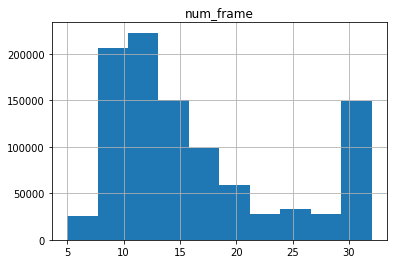

In [4]:
pointewise_count_info.hist(column="num_frame")

array([[<AxesSubplot:title={'center':'title_len'}>]], dtype=object)

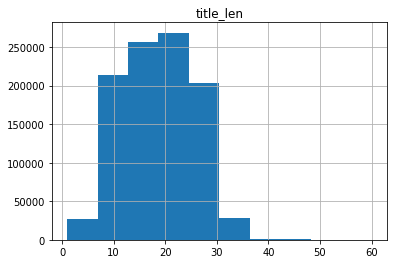

In [5]:
pointewise_count_info.hist(column="title_len")

In [6]:
pointewise_count_info.asr_len.describe()

count   1000000.000
mean         40.435
std          51.987
min           0.000
25%           8.000
50%          23.000
75%          50.000
max         772.000
Name: asr_len, dtype: float64

# 读pairwise数据

In [7]:
def from_np_array(array_string):
  array_string = re.sub(r"[[\]]", "", array_string)
  return np.array(array_string.split(), dtype=np.int32)

In [10]:

pointewise_count_info = pd.read_csv('result/pairwise_count_info.csv',
                  converters={
                      'tag_id': from_np_array,
                  })
pointewise_count_info.head()

/tmp/ipykernel_27309/2960218577.py:2: FutureWarning: Possible nested set at position 1
  array_string = re.sub(r"[[\]]", "", array_string)


,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
0,2345203561710400875,0,0,77241.000,25,28,35,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802,108,2
1,5344606281729891758,0,77241,133078.000,18,28,75,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802,108,2
2,759945328762912122,0,133078,161005.000,9,23,7,"[751495, 503895, 13664258, 643902]",11418,114,18
3,5560784129870034298,0,161005,185837.000,8,16,7,"[503895, 751495, 13664258, 643902]",11418,114,18
4,2336209090533711226,0,185837,232160.000,15,11,0,"[1356945, 542699, 680706, 426140]",11508,115,8


# 读pairwise score

In [11]:
pairwise_score = pd.read_csv('result/pairwise_score.csv')
pairwise_score

,id_1,id_2,score
0,2345203561710400875,5344606281729891758,1.000
1,759945328762912122,5560784129870034298,0.850
2,2336209090533711226,8010747189096226170,1.000
3,2588403135132530094,5380633252649788846,0.250
4,3245934094259209594,120437073895839098,1.000
...,...,...,...
67894,3750336164790283694,6578593639340324218,0.500
67895,4587992807793958251,3651241564586845614,0.050
67896,4939290286258343342,2750529751830584750,0.000
67897,7461297012077098362,5939084830845425070,1.000


# 查看部分数据

In [12]:
index = 0
print(pairwise_score.iloc[index])
check = pairwise_score.iloc[index][["id_1", "id_2"]].tolist()
pointewise_count_info[pointewise_count_info["id"].isin(check)]

id_1    2345203561710401024.000
id_2    5344606281729891328.000
score                     1.000
Name: 0, dtype: float64


,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
0,2345203561710400875,0,0,77241.000,25,28,35,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802,108,2
1,5344606281729891758,0,77241,133078.000,18,28,75,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802,108,2


In [13]:
index = 1
print(pairwise_score.iloc[index])
check = pairwise_score.iloc[index][["id_1", "id_2"]].tolist()
pointewise_count_info[pointewise_count_info["id"].isin(check)]

id_1     759945328762912128.000
id_2    5560784129870033920.000
score                     0.850
Name: 1, dtype: float64


,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
2,759945328762912122,0,133078,161005.000,9,23,7,"[751495, 503895, 13664258, 643902]",11418,114,18
3,5560784129870034298,0,161005,185837.000,8,16,7,"[503895, 751495, 13664258, 643902]",11418,114,18


In [14]:
index = 3
print(pairwise_score.iloc[index])
check = pairwise_score.iloc[index][["id_1", "id_2"]].tolist()
pointewise_count_info[pointewise_count_info["id"].isin(check)]

id_1    2588403135132530176.000
id_2    5380633252649788416.000
score                     0.250
Name: 3, dtype: float64


,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
6,2588403135132530094,0,281584,312605.000,10,23,10,"[102598, 14973559, 9712985, 380310, 55754190, ...",11701,117,1
7,5380633252649788846,0,312605,343673.000,10,27,24,"[102598, 14973559, 55813382, 55800585]",11701,117,1


In [15]:
index = 5
print(pairwise_score.iloc[index])
check = pairwise_score.iloc[index][["id_1", "id_2"]].tolist()
pointewise_count_info[pointewise_count_info["id"].isin(check)]

id_1    6362419613443853312.000
id_2    7200089050526278656.000
score                     0.000
Name: 5, dtype: float64


,id,file_id,start_offset,end_offset,num_frame,title_len,asr_len,tag_id,category_id,level1_category,level2_category
10,6362419613443853690,0,402874,443185.000,13,27,27,"[631724, 56070375, 52822, 380677, 41443783, 10...",10302,103,2
11,7200089050526279034,0,443185,480351.000,12,28,4,"[55798744, 52822, 9781151, 55747399, 55824694,...",10302,103,2


In [16]:
index = 6
print(pairwise_score.iloc[index])
check = pairwise_score.iloc[index][["id_1", "id_2"]].tolist()
pointewise_count_info[pointewise_count_info["id"].isin(check)][["id", "tag_id", "category_id"]]

id_1    7227107789393765376.000
id_2    3354019373384056320.000
score                     0.700
Name: 6, dtype: float64


,id,tag_id,category_id
12,7227107789393765754,"[102598, 14973559, 380310, 647240, 810895, 334...",11701
13,3354019373384056238,"[101810, 101882, 5872120, 55807734, 56063073, ...",10504


# 拼接数据

In [17]:
temp_data_count_df = pointewise_count_info[["id", "tag_id", "category_id"]]
temp_data_count_df.head()

,id,tag_id,category_id
0,2345203561710400875,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802
1,5344606281729891758,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802
2,759945328762912122,"[751495, 503895, 13664258, 643902]",11418
3,5560784129870034298,"[503895, 751495, 13664258, 643902]",11418
4,2336209090533711226,"[1356945, 542699, 680706, 426140]",11508


In [18]:
df1 = pd.merge(left=pairwise_score, right=temp_data_count_df, how='left', left_on='id_1', right_on='id')
df1= df1.rename(columns={'tag_id':'tag_id_1','category_id':'category_id_1'})
df1 = df1.drop(["id"],axis=1)
df1.head()

,id_1,id_2,score,tag_id_1,category_id_1
0,2345203561710400875,5344606281729891758,1.000,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802
1,759945328762912122,5560784129870034298,0.850,"[751495, 503895, 13664258, 643902]",11418
2,2336209090533711226,8010747189096226170,1.000,"[1356945, 542699, 680706, 426140]",11508
3,2588403135132530094,5380633252649788846,0.250,"[102598, 14973559, 9712985, 380310, 55754190, ...",11701
4,3245934094259209594,120437073895839098,1.000,"[55812342, 3325524, 445808]",11600


In [21]:
df2 = pd.merge(left=df1, right=temp_data_count_df, how='left', left_on='id_2', right_on='id')
df2 = df2.rename(columns={'tag_id':'tag_id_2','category_id':'category_id_2'})
df2 = df2.drop(["id"],axis=1)
df2.head()

,id_1,id_2,score,tag_id_1,category_id_1,tag_id_2,category_id_2
0,2345203561710400875,5344606281729891758,1.000,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802
1,759945328762912122,5560784129870034298,0.850,"[751495, 503895, 13664258, 643902]",11418,"[503895, 751495, 13664258, 643902]",11418
2,2336209090533711226,8010747189096226170,1.000,"[1356945, 542699, 680706, 426140]",11508,"[542699, 680706, 1356945]",11508
3,2588403135132530094,5380633252649788846,0.250,"[102598, 14973559, 9712985, 380310, 55754190, ...",11701,"[102598, 14973559, 55813382, 55800585]",11701
4,3245934094259209594,120437073895839098,1.000,"[55812342, 3325524, 445808]",11600,"[55812342, 445808, 378846, 3325524]",11600


In [38]:
# df2.to_csv("result/pairwise_score_join.csv", index=0)

<AxesSubplot:>

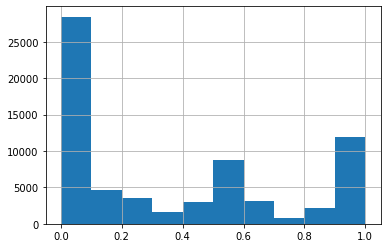

In [22]:
df2["score"].hist()

In [30]:
# df2["same_level1_category"] = 
df2["level1_category_same"] = df2[["category_id_1", "category_id_2"]].apply(lambda x: str(x["category_id_1"])[:3]==str(x["category_id_2"])[:3], axis=1)
df2["level2_category_same"] = df2[["category_id_1", "category_id_2"]].apply(lambda x: x["category_id_1"]==x["category_id_2"], axis=1)
df2.head()

,id_1,id_2,score,tag_id_1,category_id_1,tag_id_2,category_id_2,level1_category_same,level2_category_same
0,2345203561710400875,5344606281729891758,1.000,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802,True,True
1,759945328762912122,5560784129870034298,0.850,"[751495, 503895, 13664258, 643902]",11418,"[503895, 751495, 13664258, 643902]",11418,True,True
2,2336209090533711226,8010747189096226170,1.000,"[1356945, 542699, 680706, 426140]",11508,"[542699, 680706, 1356945]",11508,True,True
3,2588403135132530094,5380633252649788846,0.250,"[102598, 14973559, 9712985, 380310, 55754190, ...",11701,"[102598, 14973559, 55813382, 55800585]",11701,True,True
4,3245934094259209594,120437073895839098,1.000,"[55812342, 3325524, 445808]",11600,"[55812342, 445808, 378846, 3325524]",11600,True,True


In [31]:
df2.to_csv("result/pairwise_score_join.csv", index=0)

In [8]:

df2 = pd.read_csv("result/pairwise_score_join.csv", 
                  converters={
                      'tag_id_1': from_np_array,
                      'tag_id_2': from_np_array
                  })
df2.head()

/tmp/ipykernel_12440/2960218577.py:2: FutureWarning: Possible nested set at position 1
  array_string = re.sub(r"[[\]]", "", array_string)


,id_1,id_2,score,tag_id_1,category_id_1,tag_id_2,category_id_2,level1_category_same,level2_category_same
0,2345203561710400875,5344606281729891758,1.000,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802,True,True
1,759945328762912122,5560784129870034298,0.850,"[751495, 503895, 13664258, 643902]",11418,"[503895, 751495, 13664258, 643902]",11418,True,True
2,2336209090533711226,8010747189096226170,1.000,"[1356945, 542699, 680706, 426140]",11508,"[542699, 680706, 1356945]",11508,True,True
3,2588403135132530094,5380633252649788846,0.250,"[102598, 14973559, 9712985, 380310, 55754190, ...",11701,"[102598, 14973559, 55813382, 55800585]",11701,True,True
4,3245934094259209594,120437073895839098,1.000,"[55812342, 3325524, 445808]",11600,"[55812342, 445808, 378846, 3325524]",11600,True,True


In [9]:
df2["tag_same_num"] = df2[["tag_id_1", "tag_id_2"]].apply(lambda x: len(set(x["tag_id_1"])&set(x["tag_id_2"])), axis=1)
df2.head()

,id_1,id_2,score,tag_id_1,category_id_1,tag_id_2,category_id_2,level1_category_same,level2_category_same,tag_same_num
0,2345203561710400875,5344606281729891758,1.000,"[81774, 9779785, 55860984, 9597678, 55755306, ...",10802,"[81774, 723622, 56044756, 55831581, 55860907, ...",10802,True,True,2
1,759945328762912122,5560784129870034298,0.850,"[751495, 503895, 13664258, 643902]",11418,"[503895, 751495, 13664258, 643902]",11418,True,True,4
2,2336209090533711226,8010747189096226170,1.000,"[1356945, 542699, 680706, 426140]",11508,"[542699, 680706, 1356945]",11508,True,True,3
3,2588403135132530094,5380633252649788846,0.250,"[102598, 14973559, 9712985, 380310, 55754190, ...",11701,"[102598, 14973559, 55813382, 55800585]",11701,True,True,2
4,3245934094259209594,120437073895839098,1.000,"[55812342, 3325524, 445808]",11600,"[55812342, 445808, 378846, 3325524]",11600,True,True,3


In [10]:
df3 = df2[["score","level1_category_same", "level2_category_same","tag_same_num"]]
df3.head()

,score,level1_category_same,level2_category_same,tag_same_num
0,1.000,True,True,2
1,0.850,True,True,4
2,1.000,True,True,3
3,0.250,True,True,2
4,1.000,True,True,3


array([[<AxesSubplot:title={'center':'tag_same_num'}>]], dtype=object)

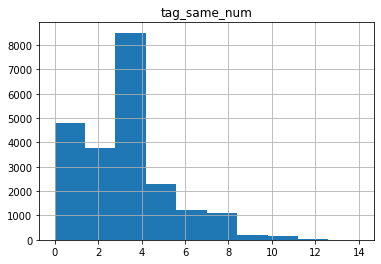

In [14]:
df3[df3['score']>0.5].hist(column=['tag_same_num'])

array([[<AxesSubplot:title={'center':'tag_same_num'}>]], dtype=object)

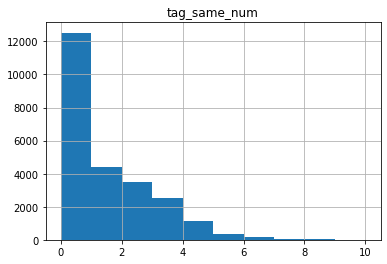

In [12]:
df3[df3['score']==0].hist(column=['tag_same_num'])

In [40]:
df3.corr(method='spearman')

,score,level1_category_same,level2_category_same,tag_same_num
score,1.000,0.341,0.330,0.487
level1_category_same,0.341,1.000,0.842,0.512
level2_category_same,0.330,0.842,1.000,0.490
tag_same_num,0.487,0.512,0.490,1.000


In [42]:
df3.corr(method='pearson')

,score,level1_category_same,level2_category_same,tag_same_num
score,1.000,0.305,0.298,0.469
level1_category_same,0.305,1.000,0.842,0.439
level2_category_same,0.298,0.842,1.000,0.419
tag_same_num,0.469,0.439,0.419,1.000


In [41]:
df3.corr(method='kendall')

,score,level1_category_same,level2_category_same,tag_same_num
score,1.000,-0.491,-0.419,0.142
level1_category_same,-0.491,1.000,-0.276,-0.026
level2_category_same,-0.419,-0.276,1.000,0.169
tag_same_num,0.142,-0.026,0.169,1.000


<AxesSubplot:>

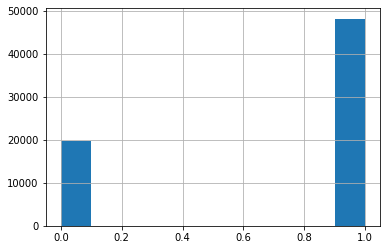

In [83]:
df2["same_category"].astype(float).hist()

<AxesSubplot:>

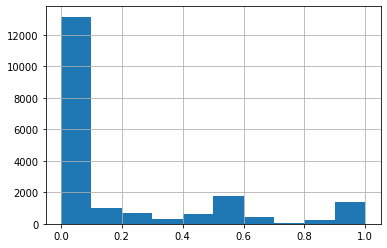

In [85]:
df2[df2["same_category"]==False]["score"].hist()

<AxesSubplot:>

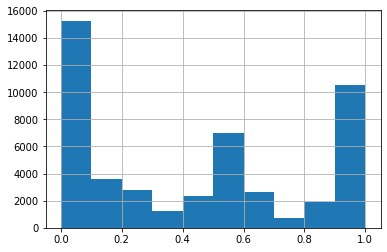

In [84]:
df2[df2["same_category"]==True]["score"].hist()

<AxesSubplot:>

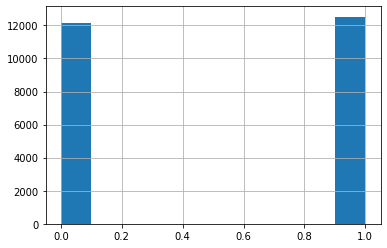

In [69]:
zero_df2 = df2[df2["score"]<=0]
zero_df2["same_category"].astype(float).hist()

<AxesSubplot:>

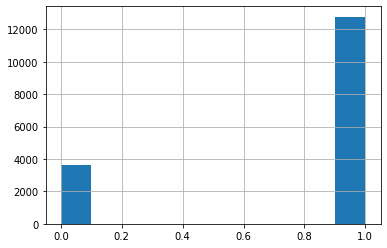

In [80]:
h_df2 = df2[(df2["score"]>0)&(df2["score"]<0.5)]
h_df2["same_category"].astype(float).hist()

<AxesSubplot:>

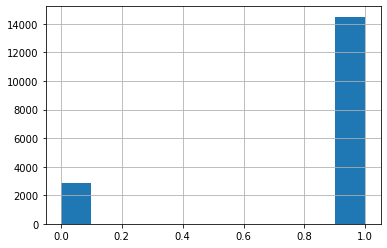

In [79]:
h_df2 = df2[(df2["score"]>=0.5)&(df2["score"]<1)]
h_df2["same_category"].astype(float).hist()

<AxesSubplot:>

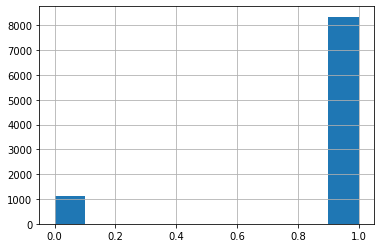

In [81]:
zero_df2 = df2[df2["score"]==1]
zero_df2["same_category"].astype(float).hist()